### Data Mining class                                        
Professor Yonggwan Won                                       
Student: Tran Dinh Son (trandinhson3086@gmail.com)                                                    
Chonnam National University

## Import libraries

In [1]:
import pandas as pa
import pandas.tools.plotting
import itertools
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from matplotlib import style
from sklearn.cross_validation import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

%matplotlib inline

C:\Users\son\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def read_data(file_path):
    data = pa.io.parsers.read_csv(file_path,header = 0)
    return data

def conver_data(file):
    data=file
    data["date"] = pa.to_datetime(data["date"])
    data["year"] = data["date"].dt.year
    data["month"] = data["date"].dt.month
    data["day"] = data["date"].dt.day
    data["hour"] = data["date"].dt.hour
    data["minute"] = data["date"].dt.minute
    data["second"] = data["date"].dt.second
    data['weekday'] = data[['date']].apply(lambda x: dt.datetime.strftime(x['date'], '%A'), axis=1)
    return data

def concat_data(d1,d2):
    data = pa.concat([d1,d2])
    return data

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #print('Confusion matrix')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

h = .02  # step size in the mesh

#Original datasets
occ_train1 = read_data('datatraining.txt')
occ_train2 = read_data('datatest.txt')
occ_test = read_data('datatest2.txt')

#Merging all the data files to make a larger training set
occ_uncon=concat_data(occ_train1,occ_train2)
occ_uncon=concat_data(occ_uncon,occ_test)
#convert date timestamp to Month, weekdays, days, months, hours
occ_ttrain=conver_data(occ_uncon)

#sns.pairplot(occ_ttrain, x_vars=['Temperature','Humidity','Light','CO2','HumidityRatio'], y_vars=['Occupancy'], size=7, aspect=0.7, kind='reg')

occ_ttrain = occ_ttrain[['Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']]

datasets = occ_ttrain
classifiers = [SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5)]
names = ["RBF SVM","Decision Tree", "Random Forest"]

X = occ_ttrain[['Temperature','Humidity','Light','CO2','HumidityRatio']]
y = occ_ttrain[['Occupancy']]

#occ_uncon.head()
occ_ttrain.head()
#Date column was removed as the data is too sparse for any deductions

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


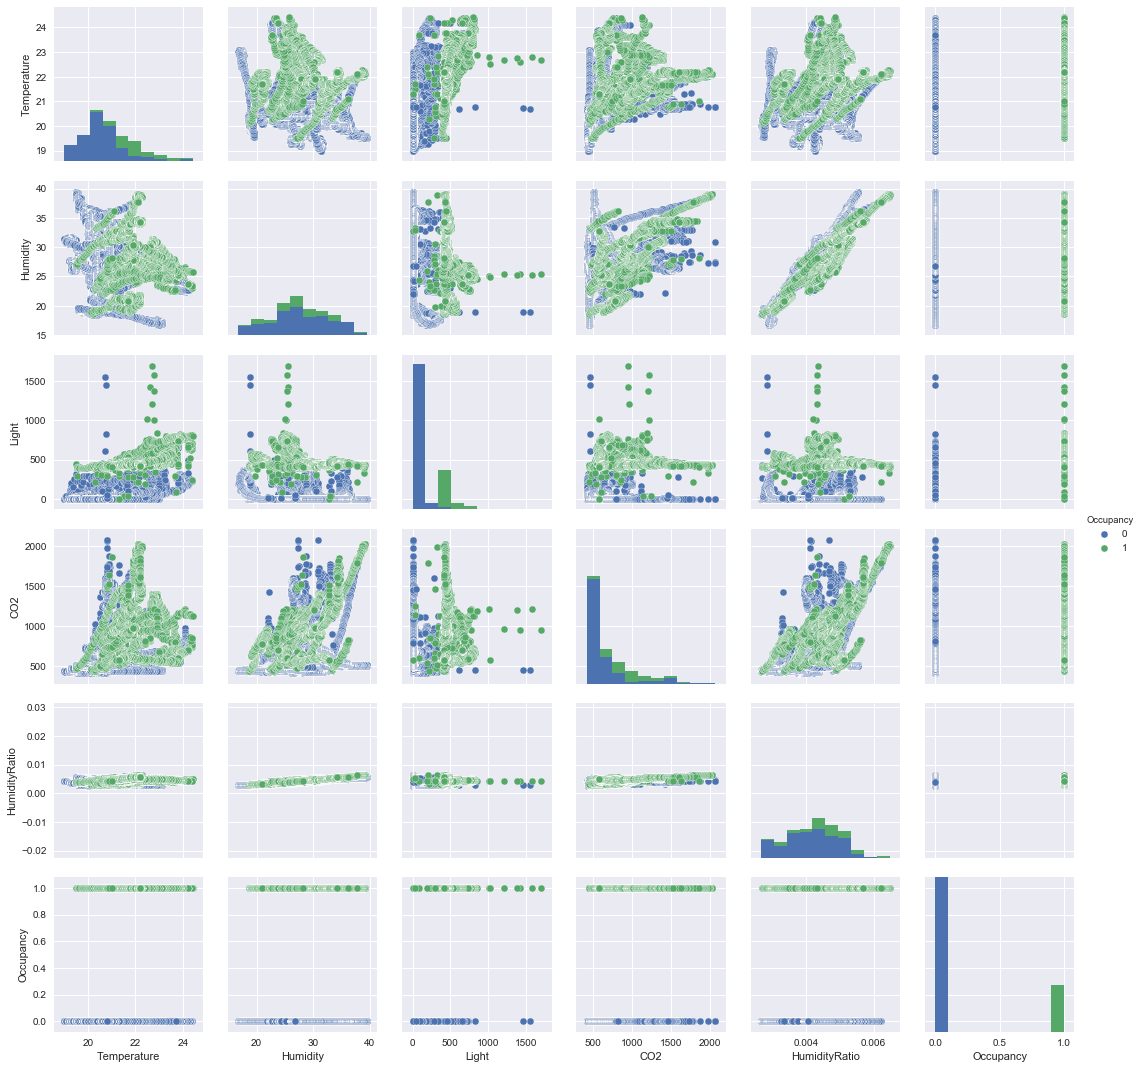

In [3]:
sns.pairplot(occ_ttrain, hue='Occupancy')

# 1. Decision Tree

In [5]:
#Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1,random_state=42)

decisionTree = DecisionTreeClassifier(max_depth=3)
decisionTree.fit(X_train, y_train)

predictions=decisionTree.predict(X_test)
print ("Accuracy of Decision Tree",accuracy_score(y_test,predictions))

Accuracy of Decision Tree 0.988813229572


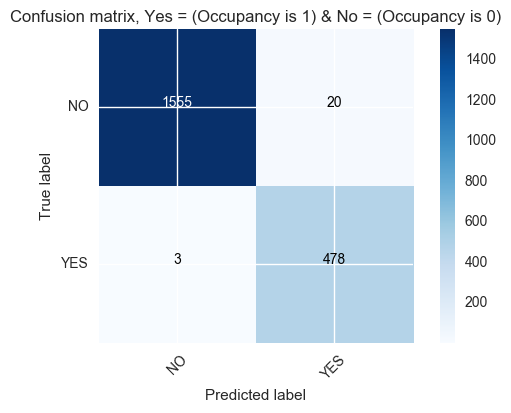

In [9]:
cnf_matrix =confusion_matrix(y_test,predictions)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NO','YES'], title='Confusion matrix, Yes = (Occupancy is 1) & No = (Occupancy is 0)')
plt.show()



# 2. MLP classifier

In [10]:
# Neural Network - MLP classifier
X=np.array(X)
y=np.array(y)
y=y.ravel()

X=X.tolist()
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1,random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(6,6,6))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

cnf_matrix =confusion_matrix(y_test,predictions)
print ("Accuracy of MLP Neural network",accuracy_score(y_test,predictions))
print ("")
print(classification_report(y_test,predictions))

Accuracy of MLP Neural network 0.988326848249

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      1575
          1       0.96      1.00      0.98       481

avg / total       0.99      0.99      0.99      2056



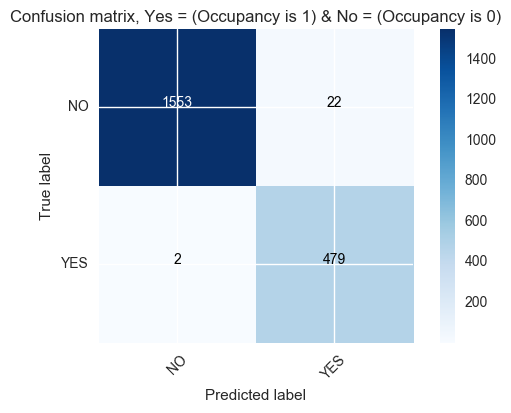

In [11]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NO','YES'], title='Confusion matrix, Yes = (Occupancy is 1) & No = (Occupancy is 0)')
plt.show()

# 3. SVM

In [13]:
#SVM

X = occ_ttrain[['CO2','HumidityRatio']]

X=np.array(X)
X=X.tolist()
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1,random_state=42)

clfs=SVC(kernel='rbf',gamma=2, C=1)
clfs.fit(X_train, y_train)

y_pred=clfs.predict(X_test)
zxc=accuracy_score(y_test,y_pred)
print('Accuracy of SVM Classifier', zxc)

Accuracy of SVM Classifier 0.90953307393


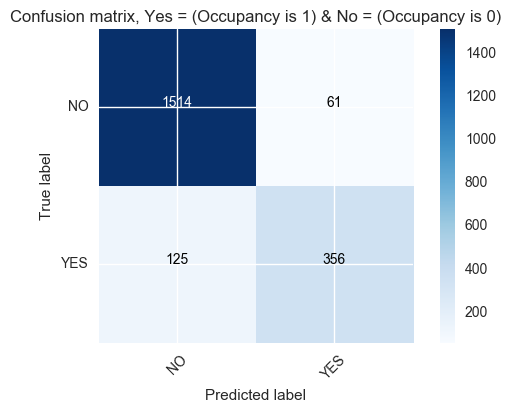

In [14]:
cnf_matrix =confusion_matrix(y_test,y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NO','YES'], title='Confusion matrix, Yes = (Occupancy is 1) & No = (Occupancy is 0)')
plt.show()